# Question 3: How many planets fall within the ranges given by the PHL data?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
nasaphldf = pd.read_csv("NASAPHL.csv")
phldf = pd.read_csv("PHL Habitable Exoplanets.csv")

In [3]:
phldf.head()

,Name,Type,Mass (ME),Radius (RE),Flux (SE),Teq (K),Period (days),Distance (ly),ESI
0,Teegarden's Star b,M-Warm Terran,1.05,NaN,1.15,264,4.9,12.0,0.95
1,TOI-700 d,M-Warm Terran,NaN,1.14,0.87,246,37.4,101.0,0.93
2,K2-72 e,M-Warm Terran,NaN,1.29,1.11,261,24.2,217.0,0.90
3,TRAPPIST-1 d,M-Warm Subterran,0.41,0.77,1.14,263,4.0,41.0,0.90
4,Kepler-1649 c,M-Warm Terran,NaN,1.06,0.75,237,19.5,301.0,0.90


In [4]:
nasaphldf.head()

,Host Name,Exoplanet Name,Orbital Period (days),Planet Mass [Earth mass],Planet Radius [Earth radii],Planet Density (g/cm**3),Planet Equilibrium Temperature [K],Insolation Flux [Earth flux],Optical Magnitude [mag],Effective Temperature [K],Stellar Mass [Solar mass],Stellar Radius [Solar radii],Stellar Age [Gyr],Earth Similarity Index (ESI)
0,HAT-P-9,HAT-P-9 b,3.922811,238.05467,15.614,0.342,1540.0,931.000,12.297,6350.0,1.28,1.34,1.6,NaN
1,HAT-P-25,HAT-P-25 b,3.652815,180.84527,12.722,0.483,1182.0,325.000,13.190,5519.0,1.01,0.92,3.2,NaN
2,HAT-P-29,HAT-P-29 b,5.723190,279.69040,13.115,0.790,1271.0,433.000,11.900,6087.0,1.45,1.30,2.2,NaN
3,HAT-P-32,HAT-P-32 b,2.150008,216.12440,22.194,0.108,1836.0,1841.000,11.289,6001.0,1.13,1.37,2.7,NaN
4,Kepler-117,Kepler-117 b,18.795923,29.87500,8.059,0.300,984.0,157.541,14.247,6150.0,1.13,1.61,5.3,NaN


In [5]:
# Gathering data to be used as proven potential habitable planets by taking 5 major factors and calculating their bounds

# Individually cleaning columns to make the most out of the data that is given
massphl = phldf["Mass (ME)"].dropna(how='any')
radiusphl = phldf["Radius (RE)"].dropna(how='any')

# Converting other 3 columns to be used without cleaning since all data is given
fluxphl = phldf["Flux (SE)"]
teqphl = phldf["Teq (K)"]
orbitphl = phldf["Period (days)"]

# Adding all 5 columns to a variable for for loop and saving list with column names
phlstats = [massphl,radiusphl,fluxphl,teqphl,orbitphl]
phlnames = ["Mass (ME)","Radius (RE)","Flux (SE)","Teq (K)","Period (days)"]

In [6]:
# Calculating the standard deviations for each column to use as guidelines to find potentially habitable planets
# Saving low and high deviations to list to use for for loop later on
index = 0
lowsd = []
highsd = []
for x in phlstats:
    mean = np.mean(x)
    sd = np.std(x)
    print(f"For {phlnames[index]}, roughly 95% of the data is between {round(mean-2*sd,3)} and {round(mean+2*sd,3)}.")
    lowsd.append(mean-2*sd)
    highsd.append(mean+2*sd)
    index += 1
    
print("Planets outside of these deviation limits will not be appended to the potential habitable planet list.")

For Mass (ME), roughly 95% of the data is between -1.395 and 8.812.
For Radius (RE), roughly 95% of the data is between 0.828 and 2.752.
For Flux (SE), roughly 95% of the data is between 0.146 and 1.673.
For Teq (K), roughly 95% of the data is between 184.756 and 300.944.
For Period (days), roughly 95% of the data is between -138.725 and 337.791.
Planets outside of these deviation limits will not be appended to the potential habitable planet list.


In [7]:
# Removing planets that have an ESI because they are already proven to be potentially habitable
rawnasadf = nasaphldf.loc[pd.isnull(nasaphldf['Earth Similarity Index (ESI)'])]
rawnasadf

,Host Name,Exoplanet Name,Orbital Period (days),Planet Mass [Earth mass],Planet Radius [Earth radii],Planet Density (g/cm**3),Planet Equilibrium Temperature [K],Insolation Flux [Earth flux],Optical Magnitude [mag],Effective Temperature [K],Stellar Mass [Solar mass],Stellar Radius [Solar radii],Stellar Age [Gyr],Earth Similarity Index (ESI)
0,HAT-P-9,HAT-P-9 b,3.922811,238.05467,15.614,0.342,1540.0,931.000,12.297,6350.00,1.28,1.34,1.600,NaN
1,HAT-P-25,HAT-P-25 b,3.652815,180.84527,12.722,0.483,1182.0,325.000,13.190,5519.00,1.01,0.92,3.200,NaN
2,HAT-P-29,HAT-P-29 b,5.723190,279.69040,13.115,0.790,1271.0,433.000,11.900,6087.00,1.45,1.30,2.200,NaN
3,HAT-P-32,HAT-P-32 b,2.150008,216.12440,22.194,0.108,1836.0,1841.000,11.289,6001.00,1.13,1.37,2.700,NaN
4,Kepler-117,Kepler-117 b,18.795923,29.87500,8.059,0.300,984.0,157.541,14.247,6150.00,1.13,1.61,5.300,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,HATS-38,HATS-38 b,4.375021,23.51942,6.882,0.403,1294.0,464.700,12.411,5732.00,0.89,1.10,11.890,NaN
328,HATS-59,HATS-59 b,5.416081,256.17098,12.621,0.700,1128.0,269.000,13.951,5670.00,1.04,1.04,4.300,NaN
329,HATS-59,HATS-59 c,1422.000000,4036.44100,12.300,11.900,176.0,0.159,13.951,5670.00,1.04,1.04,4.300,NaN
330,V1298 Tau,V1298 Tau b,24.139600,74.90000,10.270,0.380,677.0,35.000,10.116,4962.28,1.10,1.34,0.023,NaN


In [8]:
# Cleaning dataframe so it has only the data we are using
nasadf = rawnasadf[["Exoplanet Name","Planet Mass [Earth mass]","Planet Radius [Earth radii]","Insolation Flux [Earth flux]","Planet Equilibrium Temperature [K]","Orbital Period (days)"]]
nasadf

,Exoplanet Name,Planet Mass [Earth mass],Planet Radius [Earth radii],Insolation Flux [Earth flux],Planet Equilibrium Temperature [K],Orbital Period (days)
0,HAT-P-9 b,238.05467,15.614,931.000,1540.0,3.922811
1,HAT-P-25 b,180.84527,12.722,325.000,1182.0,3.652815
2,HAT-P-29 b,279.69040,13.115,433.000,1271.0,5.723190
3,HAT-P-32 b,216.12440,22.194,1841.000,1836.0,2.150008
4,Kepler-117 b,29.87500,8.059,157.541,984.0,18.795923
...,...,...,...,...,...,...
327,HATS-38 b,23.51942,6.882,464.700,1294.0,4.375021
328,HATS-59 b,256.17098,12.621,269.000,1128.0,5.416081
329,HATS-59 c,4036.44100,12.300,0.159,176.0,1422.000000
330,V1298 Tau b,74.90000,10.270,35.000,677.0,24.139600


In [9]:
# Finding the planets that meet the mass range provided by the standard deviations
massdf = nasadf.loc[(nasadf["Planet Mass [Earth mass]"] <= highsd[0]) & (nasadf["Planet Mass [Earth mass]"] >= lowsd[0])]
massdf.head()

,Exoplanet Name,Planet Mass [Earth mass],Planet Radius [Earth radii],Insolation Flux [Earth flux],Planet Equilibrium Temperature [K],Orbital Period (days)
6,Kepler-120 b,8.50,2.15,42.692,576.0,6.312501
7,Kepler-120 c,2.96,1.53,16.625,455.0,12.794585
8,Kepler-125 b,6.21,2.37,33.184,594.0,4.164389
9,Kepler-186 b,1.24,1.07,37.372,579.0,3.886791
10,Kepler-186 c,2.10,1.25,13.980,470.0,7.267302


In [10]:
# Finding the planets that meet the radius range provided by the standard deviations
radiusdf = massdf.loc[(massdf["Planet Radius [Earth radii]"] <= highsd[1]) & (massdf["Planet Radius [Earth radii]"] >= lowsd[1])]
radiusdf.head()

,Exoplanet Name,Planet Mass [Earth mass],Planet Radius [Earth radii],Insolation Flux [Earth flux],Planet Equilibrium Temperature [K],Orbital Period (days)
6,Kepler-120 b,8.50,2.15,42.692,576.0,6.312501
7,Kepler-120 c,2.96,1.53,16.625,455.0,12.794585
8,Kepler-125 b,6.21,2.37,33.184,594.0,4.164389
9,Kepler-186 b,1.24,1.07,37.372,579.0,3.886791
10,Kepler-186 c,2.10,1.25,13.980,470.0,7.267302


In [11]:
# Finding the planets that meet the flux range provided by the standard deviations
fluxdf = radiusdf.loc[(radiusdf["Insolation Flux [Earth flux]"] <= highsd[2]) & (radiusdf["Insolation Flux [Earth flux]"] >= lowsd[2])]
fluxdf.head()

,Exoplanet Name,Planet Mass [Earth mass],Planet Radius [Earth radii],Insolation Flux [Earth flux],Planet Equilibrium Temperature [K],Orbital Period (days)
24,Kepler-155 c,5.65,2.24,1.280,286.0,52.661793
132,Kepler-235 e,5.56,2.22,1.330,306.0,46.183669
191,Kepler-1455 b,5.31,2.16,1.533,298.0,49.276764
202,Kepler-1512 b,1.76,1.18,1.600,322.0,20.359726


In [12]:
# Finding the planets that meet the temperature range provided by the standard deviations
teqdf = fluxdf.loc[(fluxdf["Planet Equilibrium Temperature [K]"] <= highsd[3]) & (fluxdf["Planet Equilibrium Temperature [K]"] >= lowsd[3])]
teqdf.head()

,Exoplanet Name,Planet Mass [Earth mass],Planet Radius [Earth radii],Insolation Flux [Earth flux],Planet Equilibrium Temperature [K],Orbital Period (days)
24,Kepler-155 c,5.65,2.24,1.280,286.0,52.661793
191,Kepler-1455 b,5.31,2.16,1.533,298.0,49.276764


In [13]:
# Finding the planets that meet the orbit range provided by the standard deviations (or all conditions)
orbitdf = teqdf.loc[(teqdf["Orbital Period (days)"] <= highsd[4]) & (teqdf["Orbital Period (days)"] >= lowsd[4])]
orbitdf.head()

,Exoplanet Name,Planet Mass [Earth mass],Planet Radius [Earth radii],Insolation Flux [Earth flux],Planet Equilibrium Temperature [K],Orbital Period (days)
24,Kepler-155 c,5.65,2.24,1.280,286.0,52.661793
191,Kepler-1455 b,5.31,2.16,1.533,298.0,49.276764


In [14]:
# Generating for loop to see how many conditions an exoplanet meets and appending it to the proper list
cond0,cond1,cond2,cond3,cond4,cond5 = [],[],[],[],[],[]
for index, row in nasadf.iterrows():
    cond = 0
    if (row["Planet Mass [Earth mass]"] >= lowsd[0]) & (row["Planet Mass [Earth mass]"] <= highsd[0]):
        cond += 1
    if (row["Planet Radius [Earth radii]"] >= lowsd[1]) & (row["Planet Radius [Earth radii]"] <= highsd[1]):
        cond += 1
    if (row["Insolation Flux [Earth flux]"] >= lowsd[2]) & (row["Insolation Flux [Earth flux]"] <= highsd[2]):
        cond += 1
    if (row["Planet Equilibrium Temperature [K]"] >= lowsd[3]) & (row["Planet Equilibrium Temperature [K]"] <= highsd[3]):
        cond += 1
    if (row["Orbital Period (days)"] >= lowsd[4]) & (row["Orbital Period (days)"] <= highsd[4]):
        cond += 1
    if cond == 0:
        cond0.append(row["Exoplanet Name"])
    elif cond == 1:
        cond1.append(row["Exoplanet Name"])
    elif cond == 2:
        cond2.append(row["Exoplanet Name"])
    elif cond == 3:
        cond3.append(row["Exoplanet Name"])
    elif cond == 4:
        cond4.append(row["Exoplanet Name"])
    elif cond == 5:
        cond5.append(row["Exoplanet Name"])
        
totalcond = [len(cond0),len(cond1),len(cond2),len(cond3),len(cond4),len(cond5)]
print(totalcond)

[1, 149, 42, 111, 5, 2]


([<matplotlib.axis.XTick at 0x231be4b1cc0>,
 [Text(0, 0, 'Zero'),
  Text(0, 0, 'One'),
  Text(0, 0, 'Two'),
  Text(0, 0, 'Three'),
  Text(0, 0, 'Four'),
  Text(0, 0, 'Five')])

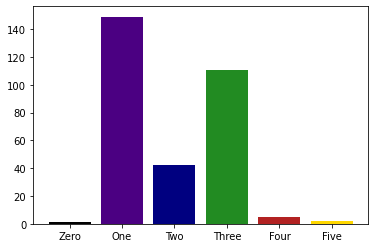

In [15]:
# Making a pie chart to represent the total number of conditions each exoplanet meets
labels = ["Zero","One","Two","Three","Four","Five"]
colors = ["black","indigo","navy","forestgreen","firebrick","gold"]
explode = (0,0,0,0,0.5,1)
xax = np.arange(len(totalcond))

# plt.pie(totalcond,explode=explode,labels=labels,colors=colors,autopct="%1.1f%%",shadow=True)
plt.bar(xax,totalcond,color=colors)
tick_locations = [value for value in xax]
plt.xticks(tick_locations,labels)

([<matplotlib.patches.Wedge at 0x231be5729e8>,
 [Text(2.7498587867899, 0.027868489632194616, 'Zero'),
  Text(0.11144543970260823, 2.7477408746039886, 'One'),
  Text(-2.606659330260611, -0.8762574598628554, 'Two'),
  Text(0.8232483686378184, -2.6238830239809037, 'Three'),
  Text(3.2364912591003496, -0.2960140702180136, 'Four'),
  Text(3.7492297560077454, -0.07600155699786673, 'Five')],
 [Text(1.4999229746126725, 0.015200994344833426, '0.3%'),
  Text(0.06078842165596812, 1.4987677497839937, '48.1%'),
  Text(-1.4218141801421513, -0.47795861447064836, '13.5%'),
  Text(0.4490445647115373, -1.431208922171402, '35.8%'),
  Text(1.9916869286771381, -0.18216250474954684, '1.6%'),
  Text(2.4994865040051635, -0.05066770466524448, '0.6%')])

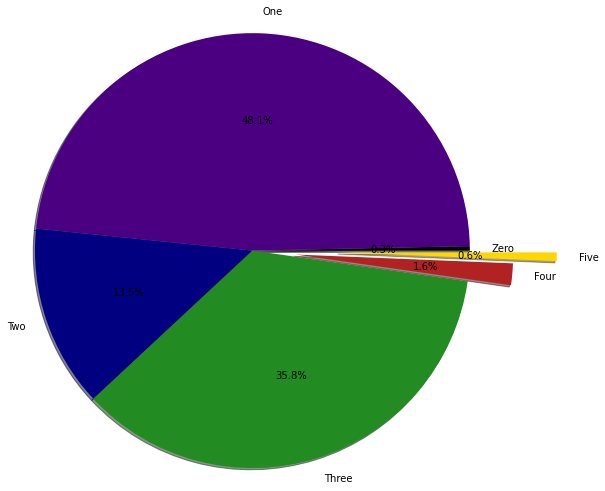

In [16]:
plt.pie(totalcond,explode=explode,labels=labels,radius=2.5,colors=colors,autopct="%1.1f%%",shadow=True)

Text(0.5, 1.0, 'Exoplanets that meet each Criteria')

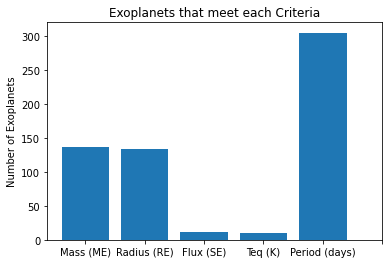

In [28]:
# Gathering number of rows for the number of exoplanets that meet each criteria
accuconddf = [
    (nasadf.loc[(nasadf["Planet Mass [Earth mass]"] <= highsd[0]) & (nasadf["Planet Mass [Earth mass]"] >= lowsd[0])]).shape[0],
    (nasadf.loc[(nasadf["Planet Radius [Earth radii]"] <= highsd[1]) & (nasadf["Planet Radius [Earth radii]"] >= lowsd[1])]).shape[0],
    (nasadf.loc[(nasadf["Insolation Flux [Earth flux]"] <= highsd[2]) & (nasadf["Insolation Flux [Earth flux]"] >= lowsd[2])]).shape[0],
    (nasadf.loc[(nasadf["Planet Equilibrium Temperature [K]"] <= highsd[3]) & (nasadf["Planet Equilibrium Temperature [K]"] >= lowsd[3])]).shape[0],
    (nasadf.loc[(nasadf["Orbital Period (days)"] <= highsd[4]) & (nasadf["Orbital Period (days)"] >= lowsd[4])]).shape[0]]

# Plotting
xaxis = np.arange(len(accuconddf))
plt.bar(xaxis,accuconddf)
tick_locations = [value for value in xax]
plt.xticks(tick_locations,phlnames)
plt.ylabel("Number of Exoplanets")
plt.title("Exoplanets that meet each Criteria")